In [1]:
!pip install diffusers transformers safetensors accelerate --quiet

In [4]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

model_id = "timbrooks/instruct-pix2pix"
cache_dir = "/home/ec2-user/SageMaker/tmp"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, cache_dir=cache_dir).to("cuda")

url = "https://huggingface.co/datasets/diffusers/diffusers-images-docs/resolve/main/mountain.png"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

prompt = "make the mountains snowy"
edit = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1.5, guidance_scale=7).images[0]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

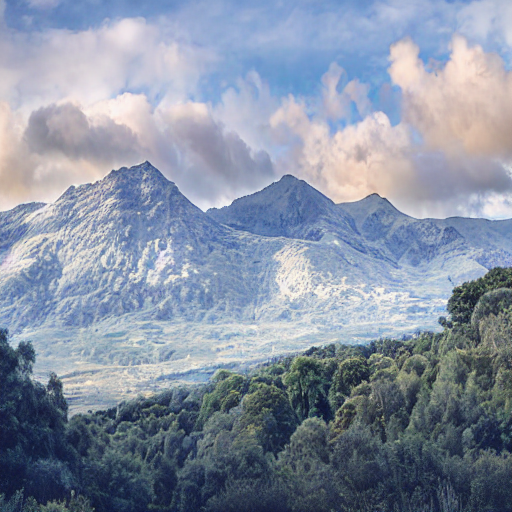

In [5]:
edit

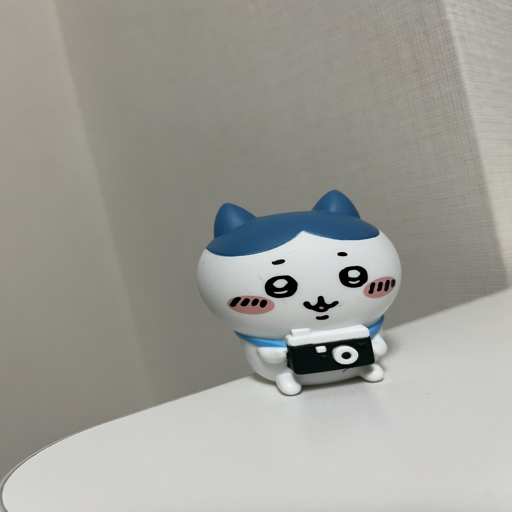

In [12]:
from PIL import Image

image = Image.open("IMG_0870.jpg").resize((512,512))
image

In [17]:
prompt = "make it a christmas background, please don't change a stuffed toy of the original image"
edit = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1.5, guidance_scale=7).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

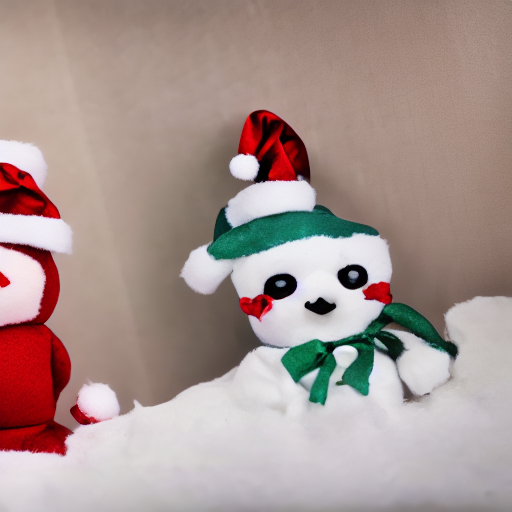

In [18]:
edit

In [ ]:
# pix2pix は全体的に画像修正しちゃう